# Sieci neuronowe - prolog

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error
import os

In [4]:
os.chdir(r"C:\Users\angel\Deep learning")

In [5]:
data = np.loadtxt('SGD_data.txt', delimiter=',')
Y = data[:, 0]
X = np.array([(x-32)*5/9 for x in data[:, 1]])

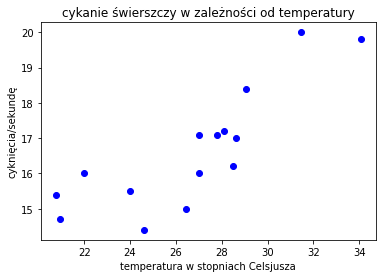

In [12]:
plt.scatter(X, Y, marker='o', c='b')
plt.title('cykanie świerszczy w zależności od temperatury')
plt.ylabel('cyknięcia/sekundę')
plt.xlabel('temperatura w stopniach Celsjusza')
plt.show()

In [56]:
samples_cnt = len(X)
weight0 = 10.0 # inicjalizacja wag
weight1 = 10.0 #
learning_rate = 0.001 #rozmiar stałej uczenia
maxIteration = 1000 #liczba iteracji

**Zadanie 1: uzupełnij listę wartości tak, aby dla każdej temperatury wyznaczyć liczbę cyknięć świerszczy przy użyciu aktualnych wag modelu liniowego**

**Zadanie 2: napisz kod, który iteracyjnie będzie poprawiać wagi, by wyznaczyły model najlepiej odwzorowujący zależność liczby cyknięć od temperatury**

In [66]:
a_list = []
b_list = []
y_list = []
for i in range(maxIteration):
    
    #Zadanie1:
    predicted_values = []
    for j in range(samples_cnt):
        predicted_values.append(weight0 * X[j] +weight1)
    
    #Zadanie2:
    
    suma_a = 0
    suma_b = 0
    
    for k in range(samples_cnt):
        suma_a += (predicted_values[k] - Y[k])* X[k]
        suma_b += (predicted_values[k] - Y[k])
    
    weight0 = weight0 - (learning_rate * (1/samples_cnt) * suma_a)
    weight1 = weight1 - (learning_rate * (1/samples_cnt) * suma_b)
    
    #dodanie wartości do list w celu późniejszej wizualizacji
    a_list.append(weight1)
    b_list.append(weight0)
    y_list.append(mean_squared_error(Y, predicted_values))

### Zobaczmy jak wygląda ostateczna prosta i jak wyglądała aktualizacja wag

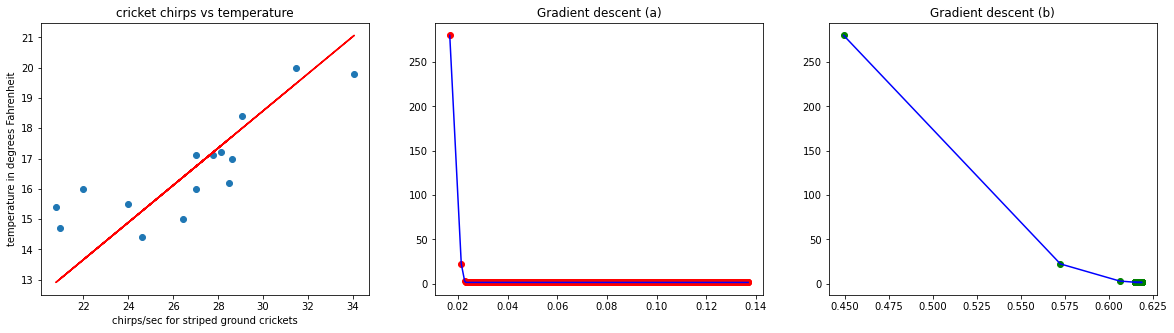

Computed weights values -> w0: 0.6146164260259743 w1: 0.1368460711722785


In [67]:
plt.figure(figsize=[20,5])
plt.subplot(1,3,1)
plt.plot(X, Y, "o")
if len(predicted_values) > 0:
    plt.plot(X, predicted_values, "r-")
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.subplot(1,3,2)
plt.scatter(a_list,y_list,c="r")
plt.plot(a_list,y_list,c="b")
plt.title("Gradient descent (a)")
plt.subplot(1,3,3)
plt.scatter(b_list,y_list,c="g")
plt.plot(b_list,y_list,c="b")
plt.title("Gradient descent (b)")
plt.show()
print("Computed weights values -> w0:", weight0, "w1:", weight1)

**Zadanie 3. Tensorflow Playground**

**Zajrzyj na stronę [playground.tensorflow.org](http://playground.tensorflow.org).**

**Ustaw minimalną sieć o zerowej liczbie warstw ukrytych (0 hidden layers; nie zmieniaj kolumny features) i naucz ją na problemie nr 3 (dwie grupy) - spójrz na wizualizację i wykres błędu treningowego i testowego - czy taka sieć (pojedynczy neuron) nauczyła się odpowiedniej granicy decyzyjnej? Zmień problem na pierwszy i naucz sieć jeszcze raz - na czym polega różnica i dlaczego? Jak sprawić by efekt znów był zadowalający?**

tu odpowiedź
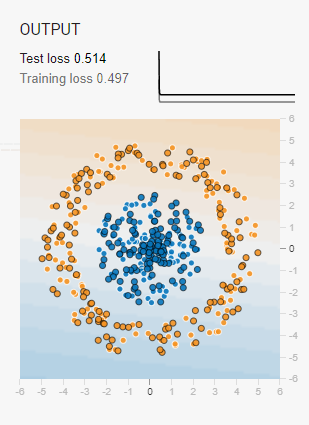

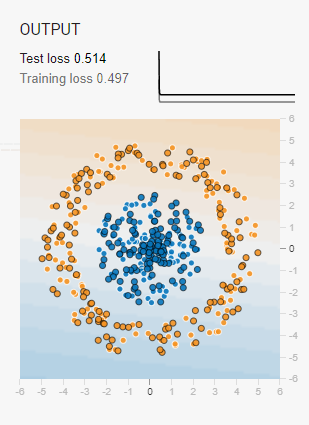

**Zadanie 4. Po przeczytaniu dokumentacji biblioteki scikit-learn stwórz klasyfikatory regresji logistycznej (Logistic Regression) oraz MLP (Multi-Layer Perceptron), naucz je na podstawie zbioru digits i użyj do rozpoznawania cyfr w zbiorze  testowym, etykiety umieść w zmiennych predicted_logreg i predicted_mlp. Spróbuj doprowadzić do momentu w którym regresja logistyczna osiągnie lepszy wynik niż MLP. Wyjaśnij dlaczego to trudne, nawiązując do metody działania tych algorytmów**

tu odpowiedź

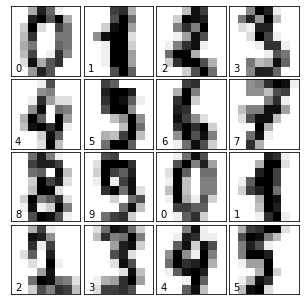

In [71]:
import itertools
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

#%matplotlib inline
digits = load_digits() #zbiór zawiera 1797 obrazków reprezentujących cyfry od 0 do 9
fig = plt.figure(figsize = (4,4))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#wyświetlanie 16 obrazków z ich etykietami
for i in range(16):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0, 7, str(digits.target[i]))
    
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=16)

#deklaracja
mlp = MLPClassifier(hidden_layer_sizes = 5, max_iter=1000)
logreg = LogisticRegression(max_iter=1000, solver='newton-cg')

#uczenie
mlp = mlp.fit(X_train,y_train)
logreg = logreg.fit(X_train,y_train)

#prognoza
predicted_logreg = logreg.predict(X_test)
predicted_mlp = mlp.predict(X_test)

[[34  0  1  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0  1]
 [ 0  2 33  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  0  0  0  1  0]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  1 29  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  2  1  0 40  1  0]
 [ 0  0  0  0  1  1  0  1 33  0]
 [ 0  0  0  0  0  0  0  0  1 34]]
[[32  0  0  0  0  2  0  0  0  1]
 [ 0 27  1  0  2  0  1  0  2  1]
 [ 0  2 32  0  0  0  0  0  1  0]
 [ 0  0  3 33  0  0  0  0  1  0]
 [ 0  2  0  0 37  0  0  0  0  0]
 [ 0  0  0  0  1 28  0  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  3  0  0 36  1  4]
 [ 0  4  0  0  0  1  0  0 30  1]
 [ 0  0  0  0  0  3  0  1  1 30]]


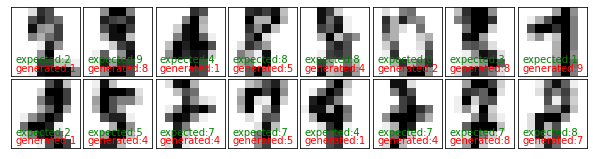

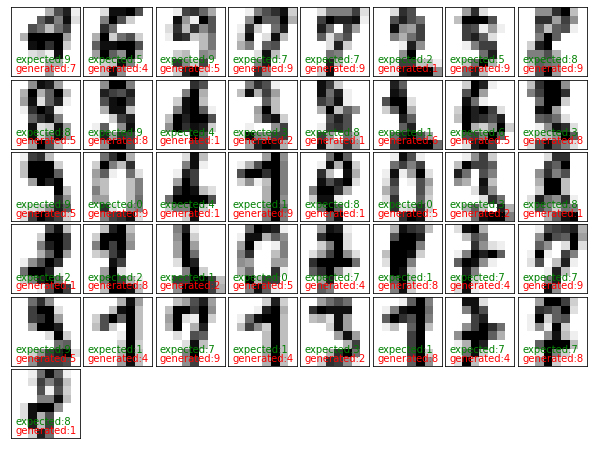

In [72]:
if predicted_logreg is not None:
    print(confusion_matrix(y_test,predicted_logreg))
    expected = y_test
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):
        if predicted_logreg[i] != expected[i]:
            ax = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            ax.text(0, 7, "generated:" + str(predicted_logreg[i]), color='red')
            ax.text(0, 6, "expected:" + str(expected[i]), color='green')
            
    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    cnt = 0
    for i in range(len(X_test)):    
        if predicted_mlp[i] != expected[i]:
            bx = fig.add_subplot(8, 8, cnt + 1, xticks=[], yticks=[])
            bx.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary, interpolation='nearest')
            cnt += 1
            bx.text(0, 7, "generated:" + str(predicted_mlp[i]), color='red')
            bx.text(0, 6, "expected:" + str(expected[i]), color='green')
    print(confusion_matrix(y_test,predicted_mlp))

### Na koniec zobaczmy na które fragmenty klasyfikator LogisticRegression zwraca uwagę

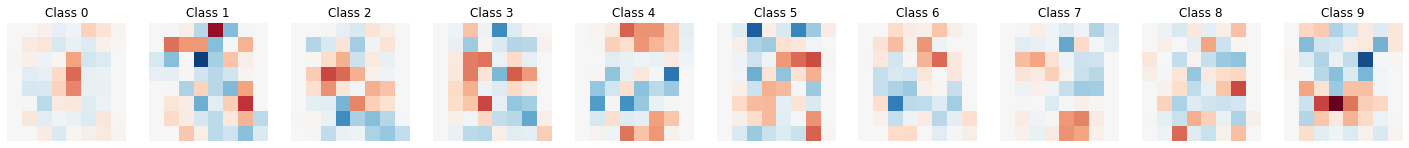

In [73]:
scale = np.max(np.abs(logreg.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(logreg.coef_[i].reshape(8, 8),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %i' % i);